## [Linear algebra on n-dimensional arrays — NumPy Tutorials](https://numpy.org/numpy-tutorials/content/tutorial-svd.html)

* 가산 혼합 [RGB - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RGB)
* 감산 혼합 [CMYK - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/CMYK)

In [1]:
import numpy as np
from scipy import misc

img = misc.face()

In [2]:
img.ndim

3

In [3]:
img.size

2359296

In [4]:
img.shape

(768, 1024, 3)

In [5]:
type(img)

numpy.ndarray

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

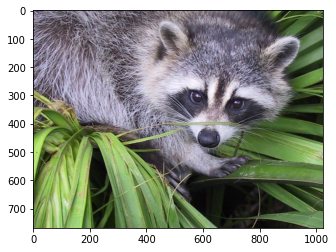

In [7]:
plt.imshow(img)

In [8]:
img[:, :, 0].shape

(768, 1024)

In [9]:
img[:, :, 0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [10]:
img[:, :, 1]

array([[112, 129, 144, ..., 126, 136, 144],
       [ 82, 103, 122, ..., 125, 141, 153],
       [ 66,  87, 108, ..., 126, 142, 153],
       ...,
       [106, 110, 124, ..., 158, 157, 158],
       [101, 111, 127, ..., 157, 156, 156],
       [101, 113, 126, ..., 156, 155, 154]], dtype=uint8)

In [11]:
img[:, :, 2]

array([[131, 148, 165, ...,  74,  82,  90],
       [100, 121, 143, ...,  71,  87,  99],
       [ 84, 105, 126, ...,  71,  87,  98],
       ...,
       [ 76,  81,  92, ...,  97,  96,  95],
       [ 72,  82,  96, ...,  96,  94,  94],
       [ 74,  84,  97, ...,  95,  93,  92]], dtype=uint8)

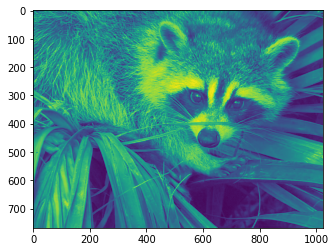

In [12]:
plt.imshow(img[:, :, 0])

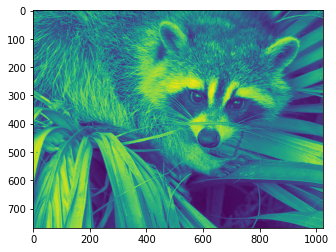

In [13]:
plt.imshow(img[:, :, 1])

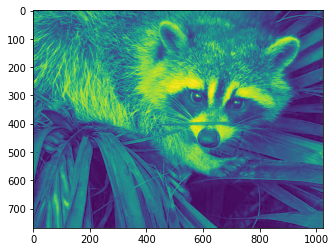

In [14]:
plt.imshow(img[:, :, 2])

In [15]:
img[0, 0]

array([121, 112, 131], dtype=uint8)

In [16]:
img_array = img / 255
img_array

array([[[0.4745098 , 0.43921569, 0.51372549],
        [0.54117647, 0.50588235, 0.58039216],
        [0.6       , 0.56470588, 0.64705882],
        ...,
        [0.46666667, 0.49411765, 0.29019608],
        [0.51372549, 0.53333333, 0.32156863],
        [0.54509804, 0.56470588, 0.35294118]],

       [[0.34901961, 0.32156863, 0.39215686],
        [0.43137255, 0.40392157, 0.4745098 ],
        [0.50980392, 0.47843137, 0.56078431],
        ...,
        [0.4627451 , 0.49019608, 0.27843137],
        [0.5254902 , 0.55294118, 0.34117647],
        [0.57254902, 0.6       , 0.38823529]],

       [[0.28627451, 0.25882353, 0.32941176],
        [0.36862745, 0.34117647, 0.41176471],
        [0.45098039, 0.42352941, 0.49411765],
        ...,
        [0.45882353, 0.49411765, 0.27843137],
        [0.52156863, 0.55686275, 0.34117647],
        [0.56470588, 0.6       , 0.38431373]],

       ...,

       [[0.34117647, 0.41568627, 0.29803922],
        [0.36862745, 0.43137255, 0.31764706],
        [0.41960784, 0

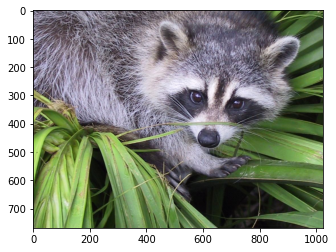

In [17]:
plt.imshow(img_array)

In [18]:
my_img = plt.imread("my_img.jpg")
my_img.shape

(2927, 2679, 3)

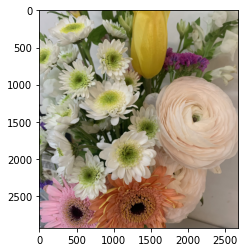

In [19]:
plt.imshow(my_img)

In [20]:
my_img.ndim

3

In [21]:
my_img.shape

(2927, 2679, 3)

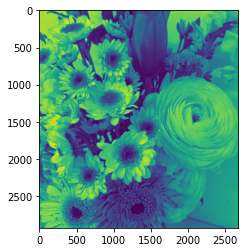

In [22]:
plt.imshow(my_img[:, :, 2])

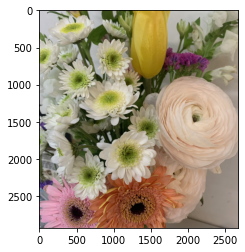

In [23]:
my_img_norm = my_img / 255
plt.imshow(my_img_norm)

## 행렬 곱셈

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Matrix_multiplication_qtl1.svg/1240px-Matrix_multiplication_qtl1.svg.png" width="300" align="left">



* 행렬 곱셈(matrix multiplication)은 두 개의 행렬에서 한 개의 행렬을 만들어내는 이항연산이다. 이 때 첫째 행렬의 열 갯수와 둘째 행렬의 행 갯수가 동일해야한다. 곱셈의 결과 새롭게 만들어진 행렬은 행렬곱(matrix product)라 하며, 첫째 행렬의 행 갯수와 둘째 행렬의 열 갯수를 가진다. 행렬 A와 B의 곱은 간단히 AB로 나타낸다.

* 벡터의 선형결합 또는 선형사상의 합성 등의 의미를 부여할 수 있다.

* 행렬 곱셈은 1812년 프랑스의 수학자 자크 비네가 선형 변환의 합성을 표현하고자 처음으로 사용하였다. 이후 행렬 곱셈은 선형대수학의 기초가 되어 수학, 통계학, 물리학, 경제학, 공학, 컴퓨터 프로그래밍 등의 분야에서 다양하게 응용되고 있다.

* [행렬 곱셈 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%96%89%EB%A0%AC_%EA%B3%B1%EC%85%88)


In [24]:
3 * 4 * 3

36

In [25]:
a = np.arange(1, 37).reshape(3, 4, 3)
a.shape

(3, 4, 3)

In [26]:
a @ [2, 2, 2]

array([[ 12,  30,  48,  66],
       [ 84, 102, 120, 138],
       [156, 174, 192, 210]])

In [27]:
b = (a[:, :, 0] * 2) + (a[:, :, 1] * 2) + (a[:, :, 2] * 2)
b.shape

(3, 4)

In [28]:
a @ [0.2126, 0.7152, 0.0722]

array([[ 1.8596,  4.8596,  7.8596, 10.8596],
       [13.8596, 16.8596, 19.8596, 22.8596],
       [25.8596, 28.8596, 31.8596, 34.8596]])

In [29]:
(a[:, :, 0] * 0.2126) + (a[:, :, 1] * 0.7152) + (a[:, :, 2] * 0.0722)

array([[ 1.8596,  4.8596,  7.8596, 10.8596],
       [13.8596, 16.8596, 19.8596, 22.8596],
       [25.8596, 28.8596, 31.8596, 34.8596]])

In [30]:
img_array.shape

(768, 1024, 3)

In [31]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray.shape

(768, 1024)

In [32]:
img_gray

array([[0.45209882, 0.51876549, 0.57815529, ..., 0.47355843, 0.51387529,
        0.54524784],
       [0.33250118, 0.41485412, 0.49104706, ..., 0.46907059, 0.53181569,
        0.57887451],
       [0.26975608, 0.35210902, 0.43446196, ..., 0.47104157, 0.53378667,
        0.57692392],
       ...,
       [0.39135137, 0.40982196, 0.46304078, ..., 0.5706549 , 0.56673333,
        0.5692549 ],
       [0.37452784, 0.41374353, 0.47675608, ..., 0.56840078, 0.56419608,
        0.56419608],
       [0.37509412, 0.42158667, 0.47340078, ..., 0.56447922, 0.56027451,
        0.55635294]])

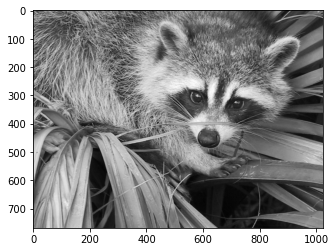

In [33]:
plt.imshow(img_gray, cmap="gray")
plt.show()

##  SVD (Singular Value Decomposition)

* [특잇값 분해 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%8A%B9%EC%9E%87%EA%B0%92_%EB%B6%84%ED%95%B4)

In [34]:
from numpy import linalg

In [35]:
img_gray.shape

(768, 1024)

In [36]:
U, s, Vt = linalg.svd(img_gray)
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [37]:
# s @ Vt

In [38]:
Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, s)

In [39]:
Sigma

array([[410.42098224,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  85.56090199,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  63.61066707, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [40]:
# Sigma @ Vt

In [41]:
linalg.norm(img_gray - U @ Sigma @ Vt)

1.4313680730871288e-12

In [42]:
np.allclose(img_gray, U @ Sigma @ Vt)

True

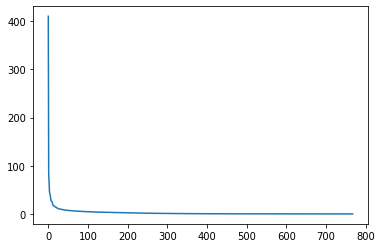

In [43]:
plt.plot(s)
plt.show()

In [44]:
# Sigma[:, :10]

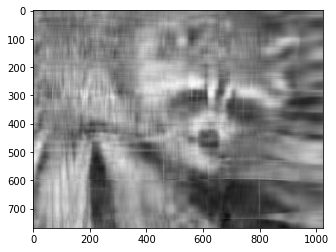

In [45]:
k = 10
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")

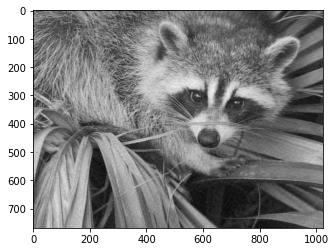

In [46]:
k = 100
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")

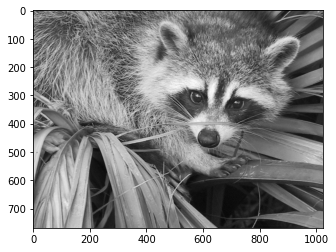

In [47]:
k = 300
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")

In [48]:
img_array.shape

(768, 1024, 3)

In [49]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 768, 1024)

In [50]:
U, s, Vt = linalg.svd(img_array_transposed)
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [51]:
Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [52]:
reconstructed = U @ Sigma @ Vt

In [53]:
reconstructed.shape

(3, 768, 1024)

In [54]:
reconstructed.min(), reconstructed.max()

(-5.471968364534341e-15, 1.000000000000004)

In [55]:
reconstructed = np.clip(reconstructed, 0, 1)
reconstructed.min(), reconstructed.max()

(0.0, 1.0)

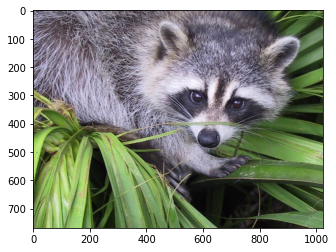

In [56]:
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show()

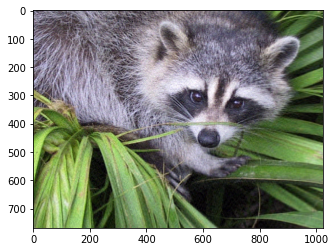

In [57]:
k = 100
approx_img = U @ Sigma[:, :, :k] @ Vt[:, :k, :]
approx_img_clip = np.clip(approx_img, 0, 1)
plt.imshow(np.transpose(approx_img_clip, (1, 2, 0)))
plt.show()